# Analisis de datos del COVID-19

Objetivos del análisis:
* Automatizar descarga y tratamiento de datos.
* Generar salidas reutilizables.
* Generar gráficos explicativos, a poder ser múltiples.
* Separar los datos en dos tablas y hacer el tratamiento eficiente completo.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfbase = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [4]:
covid=dfbase

In [9]:
covid.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [5]:
df.shape

(60622, 12)

In [9]:
df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y', errors='ignore')

In [10]:
df = df.drop(['day','month','year','geoId', 'countryterritoryCode', 
              'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis = 1)

In [11]:
renombrados={'dateRep':'Fecha', 'cases':'Casos', 'deaths':'Muertes',
                   'countriesAndTerritories':'País','continentExp':'Continente','popData2019':'Población'}
df.rename(columns=renombrados, inplace=True)

In [184]:
df = df.set_index(['País', 'Fecha']).sort_index()

In [185]:
df['Acumulado Casos'] = df.groupby(['País'])['Casos'].cumsum()

Faltan las medias moviles

In [186]:
df['Acumulado Muertes'] = df.groupby(['País'])['Muertes'].cumsum()

In [187]:
df['Ratio'] = (df['Acumulado Muertes'] / df['Acumulado Casos']).fillna(0)

In [188]:
df.reset_index(inplace=True)

In [190]:
df=df[['Continente', 'País', 'Fecha', 'Casos','Acumulado Casos', 'Muertes', 'Acumulado Muertes','Ratio', 'Población']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60622 entries, 0 to 60621
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     60622 non-null  object 
 1   day                                                         60622 non-null  int64  
 2   month                                                       60622 non-null  int64  
 3   year                                                        60622 non-null  int64  
 4   cases                                                       60622 non-null  int64  
 5   deaths                                                      60622 non-null  int64  
 6   countriesAndTerritories                                     60622 non-null  object 
 7   geoId                                                       60353 non-null  object 
 

<AxesSubplot:xlabel='count', ylabel='Continente'>

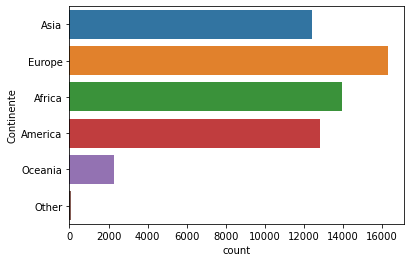

In [192]:
sns.countplot(y='Continente', data=df)

In [176]:
df.Casos.sum()

59879877

<AxesSubplot:xlabel='Continente'>

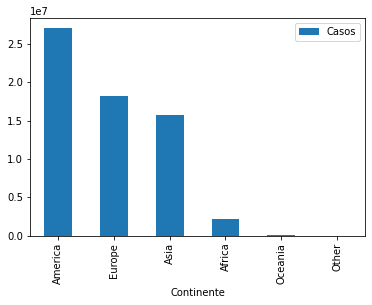

In [12]:
agrupadocontinente=df.groupby(['Continente'])['Casos'].sum().reset_index().sort_values('Casos', ascending=False)
agrupadocontinente.plot.bar(x='Continente', y='Casos')

In [15]:
agrupadopais=df.groupby(['País', 'Población'])['Casos'].sum().reset_index()
# agrupadopais.head()[df['País'] == 'Spain']
agrupadopais

,País,Población,Casos
0,Afghanistan,38041757.0,46116
1,Albania,2862427.0,38182
2,Algeria,43053054.0,83189
3,Andorra,76177.0,6745
4,Angola,31825299.0,15139
...,...,...,...
207,Vietnam,96462108.0,1346
208,Western_Sahara,582458.0,766
209,Yemen,29161922.0,2191
210,Zambia,17861034.0,17647


<AxesSubplot:xlabel='Población', ylabel='Casos'>

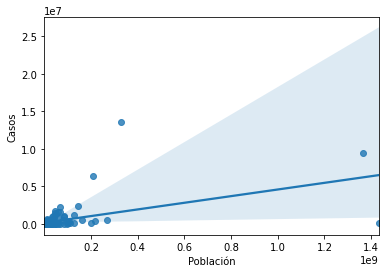

In [14]:
sns.regplot(x='Población', y ='Casos', data=agrupadopais)

Implementar el encadenado de metodos.

In [ ]:
df2 = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
df2['dateRep'] = pd.to_datetime(df2['dateRep'], format='%d/%m/%Y', errors='ignore')
df2 = df2.drop(['day','month','year','geoId', 'countryterritoryCode', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis = 1)
df2 = df2.set_index(['countriesAndTerritories', 'dateRep']).sort_index()
df2['cases acumulated'] = df2.groupby(['countriesAndTerritories'])['cases'].cumsum()
df2['deaths acumulated'] = df2.groupby(['countriesAndTerritories'])['deaths'].cumsum()
df2.index.names = ['País', 'Fecha']
df2.columns = ['Casos','Muertes','Población', 'Continente', 'Acumulado Casos', 'Acumulado Muertes']
df2.reset_index(inplace=True)b

Separar en grupos y hacer un merge para fusionar los datos.

## Method Chaining



In [67]:
salidacovid = (covid
               .drop(['day', 'month', 'year', 'geoId', 'countryterritoryCode',
                      'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis=1)
               .rename(columns={'dateRep': 'Fecha', 'cases': 'Casos',
                                'deaths': 'Muertes', 'countriesAndTerritories': 'País',
                                'popData2019': 'Población', 'continentExp': 'Continente'})
               .assign(Fecha=lambda x: pd.to_datetime(x['Fecha'],  format='%d/%m/%Y'))
               .sort_values(by=['País', 'Fecha'], ascending=[True, True])
               .assign(AcumuladoCasos=lambda x: x.groupby('País')['Casos'].transform('cumsum'),
                       AcumuladoCasos14=lambda x: 100000 * x.groupby('País')['Casos'].transform(
                   lambda x: x.rolling(14).sum()) / x['Población'],
                   AcumuladoMuertes=lambda x: x.groupby(
                   'País')['Muertes'].transform('cumsum'),
                   PorcentajeAcumuladoCasos=lambda x: x['AcumuladoCasos'] /
                   x['Población'],
                   PorcentajeAcumuladoMuertes=lambda x: x['AcumuladoMuertes'] / x['Población'])
               .set_index(['País', 'Fecha'])
               .sort_index()
               )
# paises = ['Spain']
# salidacovid[salidacovid['País'] == 'Spain']['AcumuladoCasos14'].plot()
# salidacovid[salidacovid['País'] == 'Germany']['AcumuladoCasos14'].plot()

<AxesSubplot:xlabel='Fecha'>

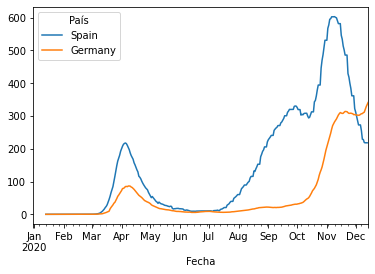

In [68]:
salidacovid.loc[['Spain', 'Germany']]['AcumuladoCasos14'].unstack(level=0).plot()